## Week 4 - Exercise 2

Author: Khushee Kapoor

Last Updated: 19/4/22

### Setting Up

To start, we have imported the following libraries:

- NumPy: to work with the data
- Pandas: to manipulate the dataframe
- MatPlotLib: for data visualization
- Seaborn: for data visulization

In [1]:
# importing the libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

Next, we read the dataset and store it into a dataframe using the read_csv() function from the Pandas library.

In [2]:
# reading the dataset
df = pd.read_csv('FuelConsumption.csv')

After that, we view the first few rows of the dataframe to get a glimpse of it. To do this, we use the head() function from the Pandas library.

In [3]:
# viewing the first 5 row
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### Q1. Select the features 'ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS' to use for building the model. Plot Emission values with respect to Engine size.

To solve Question 1, we use logical splicing to select only the mentioned columns.

In [4]:
# selecting only the mentioned columns
df = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]

Next, we use the scatterplot() function from the Seaborn library to plot emission values with respect to engine size and functions from the matplotlib library to improve the aesthetic features.

Text(0.5, 1.0, 'Emissions vs Engine Size')

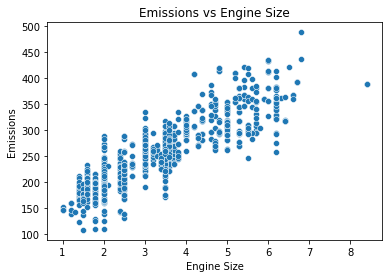

In [5]:
# plotting emission values with respect to engine size
plt.figure()
sns.scatterplot(x='ENGINESIZE', y='CO2EMISSIONS', data=df)
plt.xlabel('Engine Size')
plt.ylabel('Emissions')
plt.title('Emissions vs Engine Size')

As we can see, as the engine size increases, the emission values also increase. Also, there is a moderately strong linear relation among these variables.

### Q2. Split the data into training and test sets (70:30) to create a model using training set, evaluate the model using test set, and use model to predict unknown value.

To solve Question 2, we first split the data into independent variables (x) and independent variable (y).

In [6]:
# splitting the data into independent and dependent variables
x = df.drop(columns=['CO2EMISSIONS'])
y = df['CO2EMISSIONS']

Next, we use the PolynomialFeatures module from the sklearn library to obtain polynomial features of maximum degree 3 from the dependent variables.

In [7]:
# obtain polynomial features of maximum degree 3 from the dependent variables
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)
x = poly.fit_transform(x)

Next, we use the train_test_split() function from the sklearn library and divide the dataset into training and testing sets. We set the train_size parameter to 0.7 to ensure that 70% of the dataset is put into training.

In [8]:
# diving the dataset into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=105)

### Q3. Try to use a polynomial regression with the dataset of cubic degree and verify the accuracy by calculating Mean Absolute Error, Residual Sum of Squares, R2-score.

To solve Question 3, we first build a linear regression model using the LinearRegression module from the sklearn library and then fit the training set on which we have already obtained polynomial features of cubic degree in the above cells. 

In [9]:
# building a linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# fitting the model on the training set with polynomial features
model.fit(x_train, y_train)

LinearRegression()

Next, we verify the accuracy by calculating the mean absolute error, residual sum of squares and r2-score by using the built-in functions from the sklearn library.

In [10]:
# computing and printing the mean absolute error
from sklearn.metrics import mean_absolute_error
print(str.format('Mean Absolute Error: {:.2f}', mean_absolute_error(y_test, model.predict(x_test))))

# computing and printing the residual sum of squares
print(str.format('Residual Sum of Squares: {:.2f}', np.sum(np.square(y_test - model.predict(x_test)))))

# computing and printing the r2-score
print(str.format('R2 Score: {:.2f}', model.score(x_test, y_test)))

Mean Absolute Error: 10.43
Residual Sum of Squares: 93597.83
R2 Score: 0.92


As we can see, the model has:

- Mean Absolute Error: 10.43, which is low considering the values are in 100s
- Residual Sum of Squares: 93597.83
- R2-Score: 0.92, which signifies that the dependent variables have very high explanatory power